In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

from sklearn.cluster import KMeans
#from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split

In [3]:
wine= pd.read_csv(r'C:\Users\60250\Desktop\data mining\project\wine\wine\wine.data',header=None)
#wine.head()

In [4]:
#wine_names=pd.read_csv(r'C:\Users\60250\Desktop\data mining\project\wine\wine\wine.names')
#wine_names

In [6]:
#properties = wine_names.values
#properties = list(map(list, zip(*properties)))
#properties = pd.DataFrame(properties)

#properties

In [7]:
#properties.insert(loc=0,column='0',value='0)  Class')
#properties

In [8]:
#wine.columns=properties.loc[0]
#wine.columns=["class","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
from sklearn.metrics import fowlkes_mallows_score, silhouette_score
#data=wine["1)  Alcohol","2)  Malic acid","3)  Ash","4)  Alcalinity of ash","5)  Magnesium","6)  Total phenols","7)  Flavanoids","8)  Nonflavanoid phenols","9)  Proanthocyanins","10)  Color intensity","11)  Hue","12)  OD280/OD315 of diluted wines","13)  Proline"]

data=wine.iloc[:, 1:]
target=wine.iloc[:, 0]

data_train,data_test,target_train,target_test = train_test_split(data,target,test_size=0.3,random_state=125)


In [10]:
#Standard deviation
stdScaler = StandardScaler().fit(data_train)
data_std_train = stdScaler.transform(data_train)
data_std_test = stdScaler.transform(data_test)

print("Var of train set is:",np.var(data_std_train))
print("Mean of train set is:",np.mean(data_std_train))
print("Var of test set is:",np.var(data_std_test))
print("Mean of test set is:",np.mean(data_std_test))

Var of train set is: 1.0
Mean of train set is: -4.2921277229925405e-16
Var of test set is: 1.067870492719221
Mean of test set is: 0.13530879228111442


In [11]:
#PCA Dimensionality reduction
from sklearn.decomposition import PCA
pca_model = PCA(n_components=10).fit(data_std_train)
data_pca_train = pca_model.transform(data_std_train)
data_pca_test = pca_model.transform(data_std_test)

print("After PCA, the trains set is:",data_pca_train.shape)
print("After PCA, the test set is:",data_pca_test.shape)


After PCA, the trains set is: (124, 10)
After PCA, the test set is: (54, 10)


In [12]:
#Clustering model
kmeans = KMeans(n_clusters=3,random_state=42).fit(data_std_train)
print('Clustering model is：',kmeans)


Clustering model is： KMeans(n_clusters=3, random_state=42)


In [13]:
#Score
s = []
for i in range(2,11):
    kmeans1 = KMeans(n_clusters=i,random_state=42).fit(data)
    score1 = fowlkes_mallows_score(target,kmeans1.labels_)
    print('The FMI score of the %d times is: %f'%(i,score1))
    s.append(score1)
print('The best score is：%f'%np.max(s))

The FMI score of the 2 times is: 0.659051
The FMI score of the 3 times is: 0.583537
The FMI score of the 4 times is: 0.520734
The FMI score of the 5 times is: 0.508708
The FMI score of the 6 times is: 0.490553
The FMI score of the 7 times is: 0.421293
The FMI score of the 8 times is: 0.391336
The FMI score of the 9 times is: 0.372038
The FMI score of the 10 times is: 0.343155
The best score is：0.659051


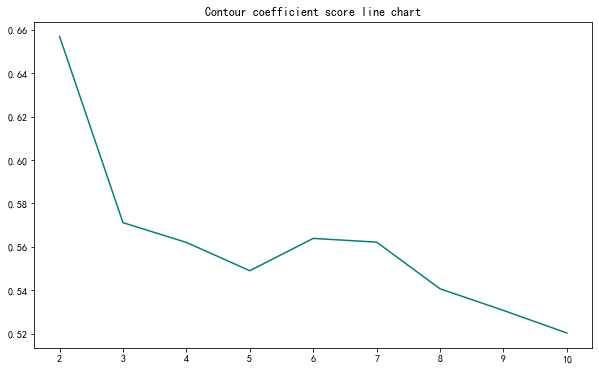

In [30]:
#Contour coefficient score

sil_score = []
for j in range(2,11):
    kmeans2 = KMeans(n_clusters=j, random_state=42).fit(data)
    score2=silhouette_score(data,kmeans2.labels_)
    sil_score.append(score2)
    
plt.rcParams['font.sans-serif'] = 'simhei'
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,6))
plt.title('Contour coefficient score line chart')
plt.plot(range(2,11),sil_score,linewidth=1.5,linestyle='-',c='teal')
plt.xticks(range(2,11,1))
plt.show()

In [15]:
from sklearn.metrics import calinski_harabasz_score
for m in range(2,11):
    kmeans3=KMeans(n_clusters=m,random_state=42).fit(wine)
    score3=calinski_harabasz_score(wine,kmeans3.labels_)
    print("The Calinski-Harabasz index of the {} times cluster model is: {}".format(m,score3))
    s.append(score3)
print('The best is：%f'%np.max(score3))

The Calinski-Harabasz index of the 2 times cluster model is: 505.42568872225087
The Calinski-Harabasz index of the 3 times cluster model is: 561.805170619475
The Calinski-Harabasz index of the 4 times cluster model is: 708.0621113463102
The Calinski-Harabasz index of the 5 times cluster model is: 787.0111625242974
The Calinski-Harabasz index of the 6 times cluster model is: 898.8434436710883
The Calinski-Harabasz index of the 7 times cluster model is: 1187.421816680515
The Calinski-Harabasz index of the 8 times cluster model is: 1297.401562015139
The Calinski-Harabasz index of the 9 times cluster model is: 1350.2415804673778
The Calinski-Harabasz index of the 10 times cluster model is: 1488.1876949469693
The best is：1488.187695
